In [1]:
import os
from PIL import Image
import numpy as np
folder_path = r'C:\Users\OptiSAR\Desktop\chunks photo\All_real_image - Copy'
image_size = (16, 16)
image_arrays = []
for filename in os.listdir(folder_path):
    if filename.endswith(".tif"): 
        img_path = os.path.join(folder_path, filename)  
        img = Image.open(img_path) 
        img = img.resize(image_size) 
        img_array = np.array(img) 
        
        if img_array.ndim == 2:  
            img_array = img_array[..., np.newaxis] 
        image_arrays.append(img_array)  
load_data = np.array(image_arrays)


In [2]:
load_data.shape

(5750, 16, 16, 1)

In [3]:
load_data

array([[[[1.9993353 ],
         [1.0110286 ],
         [0.5425461 ],
         ...,
         [0.552399  ],
         [0.5406321 ],
         [0.5227471 ]],

        [[1.1503772 ],
         [0.8415938 ],
         [0.6460106 ],
         ...,
         [0.52814364],
         [0.51835155],
         [0.49165058]],

        [[1.0049622 ],
         [0.77814984],
         [0.75232923],
         ...,
         [0.5416385 ],
         [0.52010405],
         [0.49482894]],

        ...,

        [[0.49764723],
         [0.4429837 ],
         [0.46557847],
         ...,
         [0.5588652 ],
         [0.54974794],
         [0.515577  ]],

        [[0.5163708 ],
         [0.43987697],
         [0.4620441 ],
         ...,
         [0.54407257],
         [0.5593946 ],
         [0.56996125]],

        [[0.5153838 ],
         [0.49467716],
         [0.5070965 ],
         ...,
         [0.52526695],
         [0.5527982 ],
         [0.5561854 ]]],


       [[[0.61014646],
         [0.6429649 ],
         [0.72

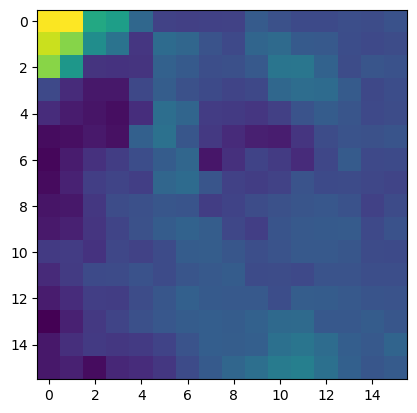

In [4]:
import matplotlib.pyplot as plt

plt.imshow(load_data[10])

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX = train_test_split(load_data, test_size=0.2, random_state=42)

In [6]:

trainX.shape

(4600, 16, 16, 1)

In [7]:
def load_real_samples():
    x = trainX.astype('float32')
    x = (x-127.5)/127.5
    return x

In [8]:
dataset = load_real_samples()

In [9]:
def generate_real_samples(dataset,n_samples):
    ix = np.random.randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    y=np.ones((n_samples,1))
    return x,y

# Define discriminatormodel

In [11]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU,Activation
import numpy as np
from tensorflow.keras.activations import gelu

In [12]:
# def generate_fake_samples(n_samples):
#     x=np.random.rand(16*16*3*n_samples)
#     x=-1+x*2
#     x = x.reshape((n_samples,16,16,3))
#     y=np.zeros((n_samples,0))
#     return x,y
    

In [13]:
def define_discriminator(in_shape=(16,16,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(Activation(gelu))
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
    model.add(Activation(gelu))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same'))
    model.add(Activation(gelu))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(256, activation=gelu))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [14]:
d_model =  define_discriminator()
d_model.summary()

C:\jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,617 (732.88 KB)

 Trainable params: 187,617 (732.88 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU,Reshape,Conv2DTranspose,Activation
import numpy as np
from tensorflow.keras.activations import gelu

In [16]:
# Define generator
def define_generator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, padding='same', input_shape=(16, 16, 1)))
    model.add(Activation(gelu))
    model.add(Flatten())
    model.add(Dense(256, activation=gelu))
    model.add(Reshape((16, 16, 1)))
    model.add(Conv2D(1, kernel_size=3, padding='same', activation='tanh'))
    return model

In [17]:

g_model=define_generator()
g_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 16, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 1)           │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,195,210 (16.00 MB)

 Trainable params: 4,195,210 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import os
from PIL import Image
import numpy as np

folder_path = r'C:\Users\OptiSAR\Desktop\chunks photo\Modified image - Copy'
image_size = (16, 16)
image_arrays = []

for filename in os.listdir(folder_path):
    if filename.endswith(".tif"): 
        img_path = os.path.join(folder_path, filename)  
        img = Image.open(img_path) 
        img = img.resize(image_size) 
        img_array = np.array(img) 
        img_array = img_array / 255.0  # Normalize to [0, 1]

        if img_array.ndim == 2:  
            img_array = img_array[..., np.newaxis]  # 

        image_arrays.append(img_array)  
modified_data = np.array(image_arrays)

In [19]:
def generate_fake_samples(g_model, modified_data, batch_size):
    if batch_size > len(modified_data):
        raise ValueError("Batch size exceeds the number of available images.")
    indices = np.random.randint(0, len(modified_data), batch_size)
    input_images = modified_data[indices]
    fake_images = g_model.predict(input_images)
    
    return fake_images

In [20]:
def define_gan(g_model,d_model):
    d_model.trainable=False
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt)
    return model

In [21]:
gan_model= define_gan(g_model,d_model)

In [22]:
gan_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 16, 16, 1)           │       4,195,210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 1)                   │         187,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,382,827 (16.72 MB)

 Trainable params: 4,195,210 (16.00 MB)

 Non-trainable params: 187,617 (732.88 KB)

In [27]:
def train(g_model, d_model, gan_model, dataset, modified_data, n_epochs=50, n_batch=64):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch_size = int(n_batch / 2)

    for i in range(n_epochs): 
        for j in range(bat_per_epo):
            
            X_real, y_real = generate_real_samples(dataset, half_batch_size)
            d_loss1 = d_model.train_on_batch(X_real, y_real)
            
            X_fake = generate_fake_samples(g_model, modified_data, half_batch_size)
            y_fake = np.zeros((half_batch_size, 1))
            d_loss2 = d_model.train_on_batch(X_fake, y_fake)
            
            X_gan = generate_fake_samples(g_model, modified_data, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            print(f'd_loss1: {d_loss1}, d_loss2: {d_loss2}, g_loss: {g_loss}')
        
        if (i + 1) % 29 == 0:
            summarize_performance(i, g_model, d_model, dataset,modified_data,n_samples=80)

In [29]:
def summarize_performance(epoch, g_model, d_model, dataset,modified_data,n_samples=80):
    X_real, y_real = generate_real_samples(dataset,n_samples) 
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    X_fake, y_fake = generate_fake_samples(g_model,n_samples) 
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    save_plot(X_fake,epoch)
    filename = os.path.join(r'C:\Users\OptiSAR\Desktop\gan\save_image', "generate_model_%03d.h5" % (epoch+1))
    g_model.save(filename)

In [31]:
from matplotlib import pyplot
save_dir=r'C:\Users\OptiSAR\Desktop\gan\save image'
def save_plot(examples, epoch, n=7, save_dir=save_dir):
    # Normalize the images
    examples = (examples + 1) / 2.0
    if not os.path.exist(save_dir):
        os.makedirs(save_dir)
    for i in range(n * n):
        pyplot.subplot(n, n, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    filename = os.path.join(save_dir, 'generated_plot_e%03d.tif' % (epoch+1))
    pyplot.savefig(filename, format='tif')
    pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, modified_data, n_epochs=50, n_batch=64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
d_loss1: [array(0.7478722, dtype=float32), array(0.09462649, dtype=float32)], d_loss2: [array(0.7479249, dtype=float32), array(0.09452452, dtype=float32)], g_loss: [array(0.7479249, dtype=float32), array(0.7479249, dtype=float32), array(0.09452452, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
d_loss1: [array(0.7478731, dtype=float32), array(0.09459095, dtype=float32)], d_loss2: [array(0.7479205, dtype=float32), array(0.09448925, dtype=float32)], g_loss: [array(0.7479205, dtype=float32), array(0.7479205, dtype=float32), array(0.09448925, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
d_loss1: [array(0.7478849, dtype=float32), array(0.09465628, dtype=float32)], d_loss2: [array(0.7479342, dtype=float32), array(0.09455472, dtype=float32)], g_loss: [array(0.7479342, dtype=float32), array(0.7479342, dtype=float32), array(0.094

In [ ]:
x1= modified_data[0:1]

In [ ]:
im_out = g_model.predict(x1)

In [ ]:
output = plt.imshow(im_out[0,:,:,0], cmap = 'jet')

In [ ]:
import tifffile

In [ ]:
image_data = im_out[0, :, :, 0] / np.max(im_out[0, :, :, 0])

# Save the image as a .tif file with float32 format
tifffile.imwrite('output_jmage00.tif', image_data.astype(np.float32))

In [ ]:
def generate_fake_samples(g_model, batch_size):
    input_dim = g_model.input_shape[1]
    x_input = np.random.randn(batch_size * input_dim)
    x_input = x_input.reshape(batch_size, input_dim)
    x = g_model.predict(x_input)
    return x
    